In [1]:
"""Done By Fahimul Gaffar for COMP 3400"""

'Done By Fahimul Gaffar for COMP 3400'

In [122]:
import pandas as pd
pd.__version__

'2.0.3'

In [123]:
from sklearn.model_selection import train_test_split

# Load the dataset
wine_data = pd.read_csv('C:\\Users\\Gaffar\\Desktop\\wine-data-set.csv')

In [124]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


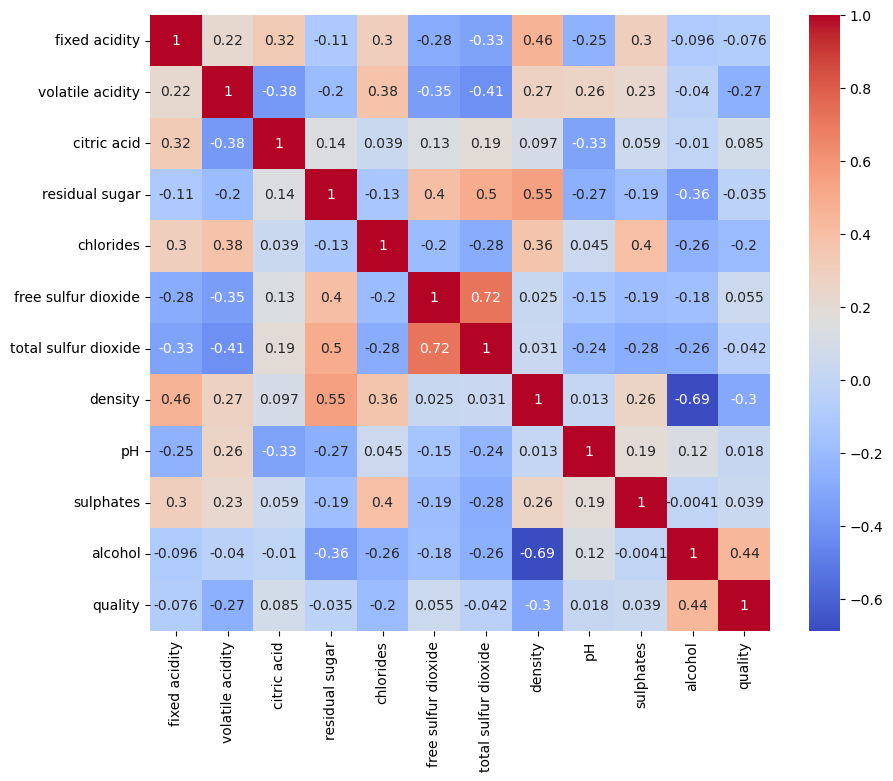

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = wine_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

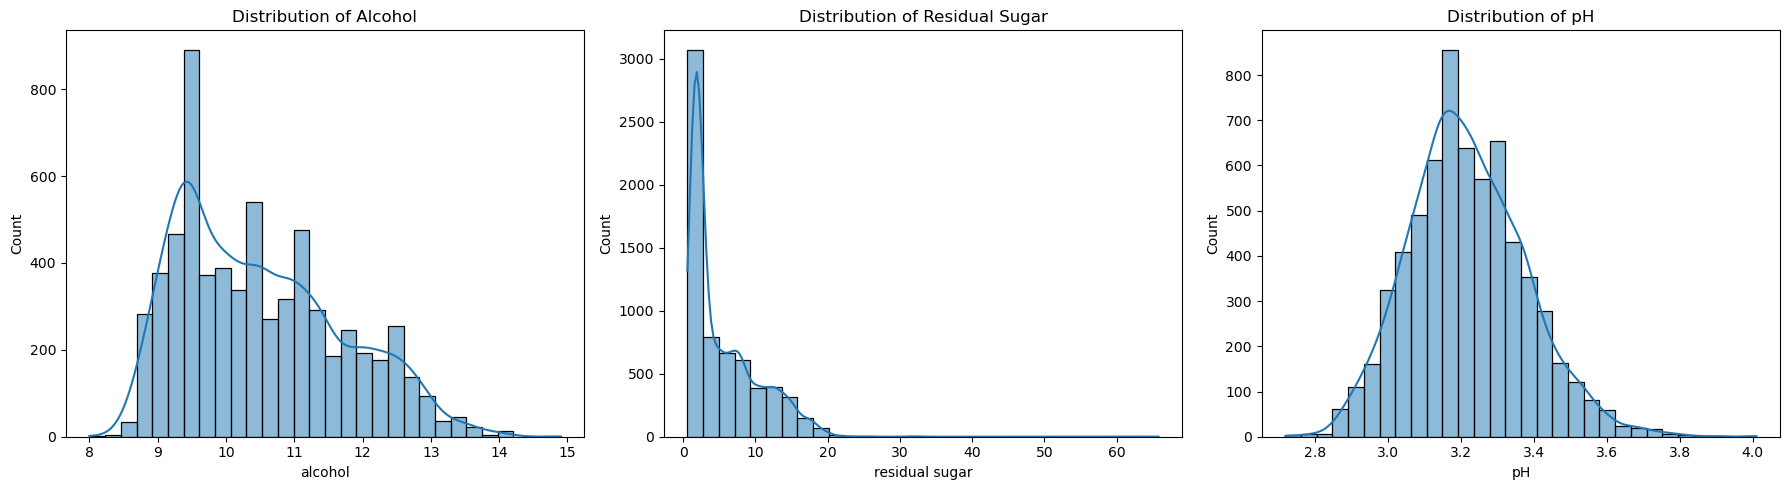

In [126]:
# Distribution plots for 'alcohol', 'residual sugar', and 'pH'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Alcohol
sns.histplot(wine_data['alcohol'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Alcohol')

# Residual Sugar
sns.histplot(wine_data['residual sugar'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Residual Sugar')

# pH
sns.histplot(wine_data['pH'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of pH')

plt.tight_layout()
plt.show()

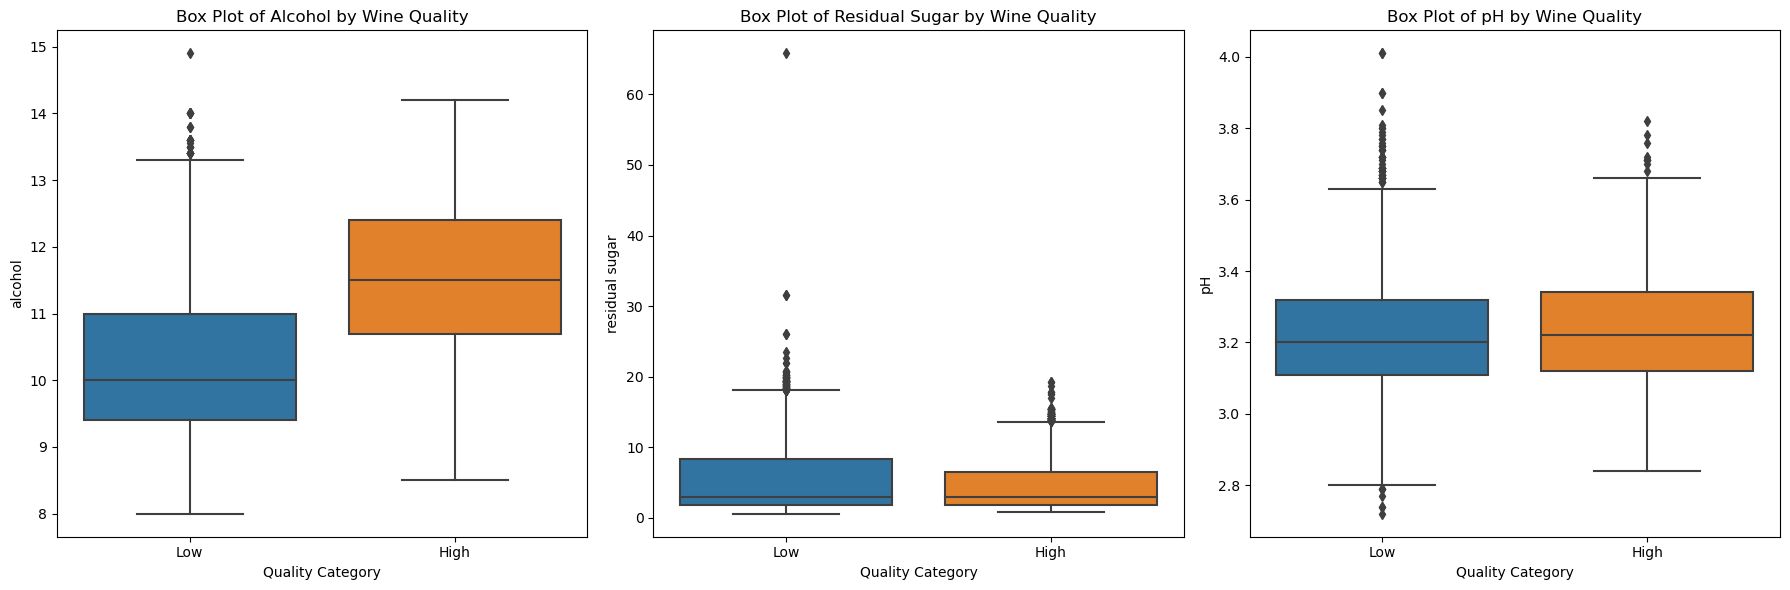

In [133]:
# Creating binary quality category for the box plots
wine_data['Quality Category'] = wine_data['quality_binary'].map({0: 'Low', 1: 'High'})

# Box plots for 'alcohol', 'residual sugar', and 'pH' by quality category
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Alcohol
sns.boxplot(x='Quality Category', y='alcohol', data=wine_data, ax=axes[0])
axes[0].set_title('Box Plot of Alcohol by Wine Quality')

# Residual Sugar
sns.boxplot(x='Quality Category', y='residual sugar', data=wine_data, ax=axes[1])
axes[1].set_title('Box Plot of Residual Sugar by Wine Quality')

# pH
sns.boxplot(x='Quality Category', y='pH', data=wine_data, ax=axes[2])
axes[2].set_title('Box Plot of pH by Wine Quality')

plt.tight_layout()
plt.show()

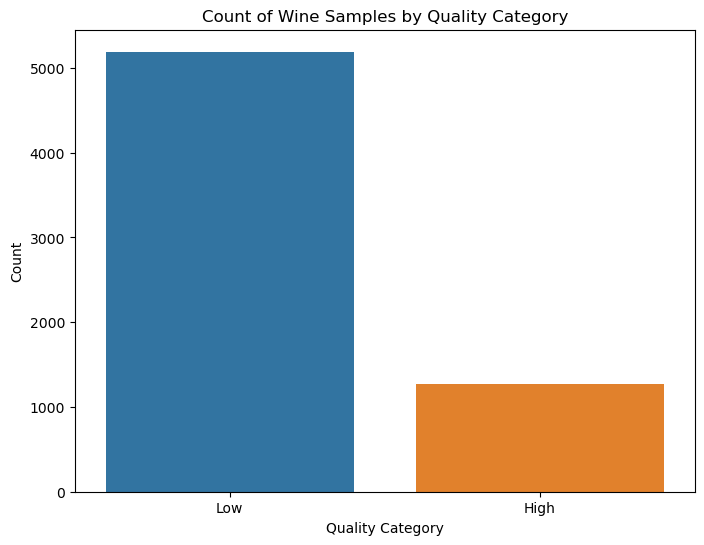

In [134]:
# Bar chart for wine quality count
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality Category', data=wine_data)
plt.title('Count of Wine Samples by Quality Category')
plt.ylabel('Count')
plt.xlabel('Quality Category')
plt.show()

In [129]:
import statsmodels.api as sm

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     243.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:41:34   Log-Likelihood:                -7173.2
No. Observations:                6463   AIC:                         1.437e+04
Df Residuals:                    6451   BIC:                         1.445e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   54.7616     11.920      4.594      0.000      31.394      78.129
fixed acidity            0.0678      0.016      4.344      0.000       0.037       0.098
volatile acidity        -1.3387      0.078    -17.255      0.000      -1.491      -1.187
citric acid             -0.1257      0.080     -1.575      0.115      -0.282       0.031
residual sugar           0.0438      0.005      8.485      0.000       0.034       0.054
chlorides               -0.4715      0.333     -1.416      0.157      -1.124       0.181
free sulfur dioxide      0.0059      0.001      7.864      0.000       0.004       0.007
total sulfur dioxide    -0.0025      0.000     -8.994      0.000      -0.003      -0.002
density                -53.9450     12.164     -4.435      0.000     -77.791     -30.099
pH                       0.4301      0.091      4.748      0.000       0.253       0.608
sulphates                0.7716      0.076     10.126      0.000       0.622       0.921
alcohol                  0.2690      0.017     16.039      0.000       0.236       0.302
==============================================================================
Omnibus:                      143.658   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.036
Skew:                          -0.008   Prob(JB):                     4.33e-71
Kurtosis:                       4.097   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
# Increased max_iter for convergence
model = LogisticRegression(max_iter=20000) 
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate and return the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Baseline model:", accuracy)

Accuracy of Baseline model: 0.5382830626450116


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Convert 'quality' into a binary target variable
# Assuming quality ratings >= 7 as high quality (1) and < 7 as low quality (0)
wine_data['quality_binary'] = (wine_data['quality'] >= 7).astype(int)

# Initial predictor - 'alcohol'
predictor = 'alcohol'

# Applying five different transformations and building logistic regression models for each
transformations = {
    'logarithmic': np.log,
    'square': np.square,
    'square_root': np.sqrt,
    'exponential': np.exp,
    'reciprocal': np.reciprocal
}

# Placeholder for model results
model_results = {}

for transformation_name, transformation_function in transformations.items():
    # Apply the transformation
    transformed_data = wine_data.copy()
    transformed_data[predictor] = transformation_function(transformed_data[predictor])

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        transformed_data[[predictor]], 
        transformed_data['quality_binary'], 
        test_size=0.2, 
        random_state=42
    )

    # Building the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Evaluating the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Storing the results
    model_results[transformation_name] = {
        'Train Score': train_score,
        'Test Score': test_score
    }

model_results



{'logarithmic': {'Train Score': 0.8131528046421663,
  'Test Score': 0.8020108275328693},
 'square': {'Train Score': 0.8168278529980658,
  'Test Score': 0.8120649651972158},
 'square_root': {'Train Score': 0.8143133462282398,
  'Test Score': 0.8105181747873164},
 'exponential': {'Train Score': 0.8065764023210832,
  'Test Score': 0.7904098994586234},
 'reciprocal': {'Train Score': 0.8065764023210832,
  'Test Score': 0.7904098994586234}}

In [132]:
# Initial set of predictors
initial_predictors = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
    'pH', 'sulphates', 'alcohol'
]

# Generating five different subsets (1-3 predictors each) to be dropped
import random

# Seed for reproducibility
random.seed(42)

subsets_to_drop = []
for _ in range(5):
    subset_size = random.randint(1, 3)
    subsets_to_drop.append(random.sample(initial_predictors, subset_size))

# Placeholder for model results
feature_selection_results = {}

for i, subset in enumerate(subsets_to_drop, 1):
    # Dropping the selected predictors
    reduced_data = wine_data.drop(columns=subset)

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        reduced_data.drop(columns=['quality', 'quality_binary']), 
        reduced_data['quality_binary'], 
        test_size=0.2, 
        random_state=42
    )

    # Building the Logistic Regression model
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)

    # Evaluating the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Storing the results
    feature_selection_results[f'Set {i} (Dropped: {subset})'] = {
        'Train Score': train_score,
        'Test Score': test_score
    }

feature_selection_results

{"Set 1 (Dropped: ['volatile acidity', 'fixed acidity', 'chlorides'])": {'Train Score': 0.818375241779497,
  'Test Score': 0.819798917246713},
 "Set 2 (Dropped: ['residual sugar'])": {'Train Score': 0.8195357833655706,
  'Test Score': 0.822892498066512},
 "Set 3 (Dropped: ['volatile acidity'])": {'Train Score': 0.8208897485493231,
  'Test Score': 0.8213457076566125},
 "Set 4 (Dropped: ['pH', 'volatile acidity', 'total sulfur dioxide'])": {'Train Score': 0.8199226305609284,
  'Test Score': 0.819798917246713},
 "Set 5 (Dropped: ['fixed acidity'])": {'Train Score': 0.8168278529980658,
  'Test Score': 0.822892498066512}}

In [138]:
"""In the data preparation practice, we performed two distinct types of transformations on the wine  dataset and built logistic regression models to assess their impact on accuracy. These transformations included modifying a single predictor through various mathematical transformations and performing featureselection by dropping different subsets of predictors."""

'In the data preparation practice, we performed two distinct types of transformations on the wine  dataset and built logistic regression models to assess their impact on accuracy. These transformations included modifying a single predictor through various mathematical transformations and performing featureselection by dropping different subsets of predictors.'

In [139]:
"""Predictor Transformations: The first approach involved applying five different transformations (logarithmic, square, square root, exponential, and reciprocal) to the 'alcohol' predictor. The accuracy varied slightly with each transformation, indicating the sensitivity of the logistic regression model to changes in the distribution and scale of input variables. The square transformation led to the highest test accuracy (81.21%), closely followed by the square root and logarithmic transformations. This suggests that moderate transformations that preserve or enhance the relationship between the predictor and the target variable can improve model performance."""

"Predictor Transformations: The first approach involved applying five different transformations (logarithmic, square, square root, exponential, and reciprocal) to the 'alcohol' predictor. The accuracy varied slightly with each transformation, indicating the sensitivity of the logistic regression model to changes in the distribution and scale of input variables. The square transformation led to the highest test accuracy (81.21%), closely followed by the square root and logarithmic transformations. This suggests that moderate transformations that preserve or enhance the relationship between the predictor and the target variable can improve model performance."

In [140]:
"""Feature Selection: In the second approach, we dropped different subsets of predictors, each containing 1 to 3 predictors, and observed the impact on model accuracy. The highest test accuracy was achieved when 'fixed acidity' was dropped (82.21%), indicating that this predictor might not be highly informative for the classification task, or it might be collinear with other predictors. In general, the accuracy remained relatively stable across different subsets, suggesting a robustness in the dataset where no single predictor dramatically changes the performance."""

"Feature Selection: In the second approach, we dropped different subsets of predictors, each containing 1 to 3 predictors, and observed the impact on model accuracy. The highest test accuracy was achieved when 'fixed acidity' was dropped (82.21%), indicating that this predictor might not be highly informative for the classification task, or it might be collinear with other predictors. In general, the accuracy remained relatively stable across different subsets, suggesting a robustness in the dataset where no single predictor dramatically changes the performance."

In [141]:
"""Comparing to the Bottom-Line Accuracy: The bottom-line accuracy refers to the baseline performance of the model without any data preparation or feature manipulation. Both approaches of data preparation (predictor transformation and feature selection) showed that careful manipulation of features can lead to slight improvements in model accuracy. The improvements, while not dramatic, highlight the importance of understanding the underlying data and the impact of each predictor on the model. The results demonstrate that both reducing the number of predictors (feature selection) and transforming the scale or distribution of predictors can be effective strategies for optimizing model performance, depending on the specific characteristics of the dataset and the target variable."""

'Comparing to the Bottom-Line Accuracy: The bottom-line accuracy refers to the baseline performance of the model without any data preparation or feature manipulation. Both approaches of data preparation (predictor transformation and feature selection) showed that careful manipulation of features can lead to slight improvements in model accuracy. The improvements, while not dramatic, highlight the importance of understanding the underlying data and the impact of each predictor on the model. The results demonstrate that both reducing the number of predictors (feature selection) and transforming the scale or distribution of predictors can be effective strategies for optimizing model performance, depending on the specific characteristics of the dataset and the target variable.'

In [142]:
"""Overall, these exercises underscore the significance of data preparation in machine learning. They show that even simple changes in the dataset can influence the performance of a model, emphasizing the need for thoughtful data analysis and preprocessing in predictive modeling tasks."""

'Overall, these exercises underscore the significance of data preparation in machine learning. They show that even simple changes in the dataset can influence the performance of a model, emphasizing the need for thoughtful data analysis and preprocessing in predictive modeling tasks.'